In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# We can visualize linear regression properly using seaborn
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('temperatures.csv')

In [3]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [4]:
# To predict month-wise temperature, we have to select any month as the O/P variable
# Eqn of linear regression: y = mx + c
# Here x is our input variable which we'll take as any month
x = df['YEAR']

# y is our output(dependent)variable
y = df['JAN']

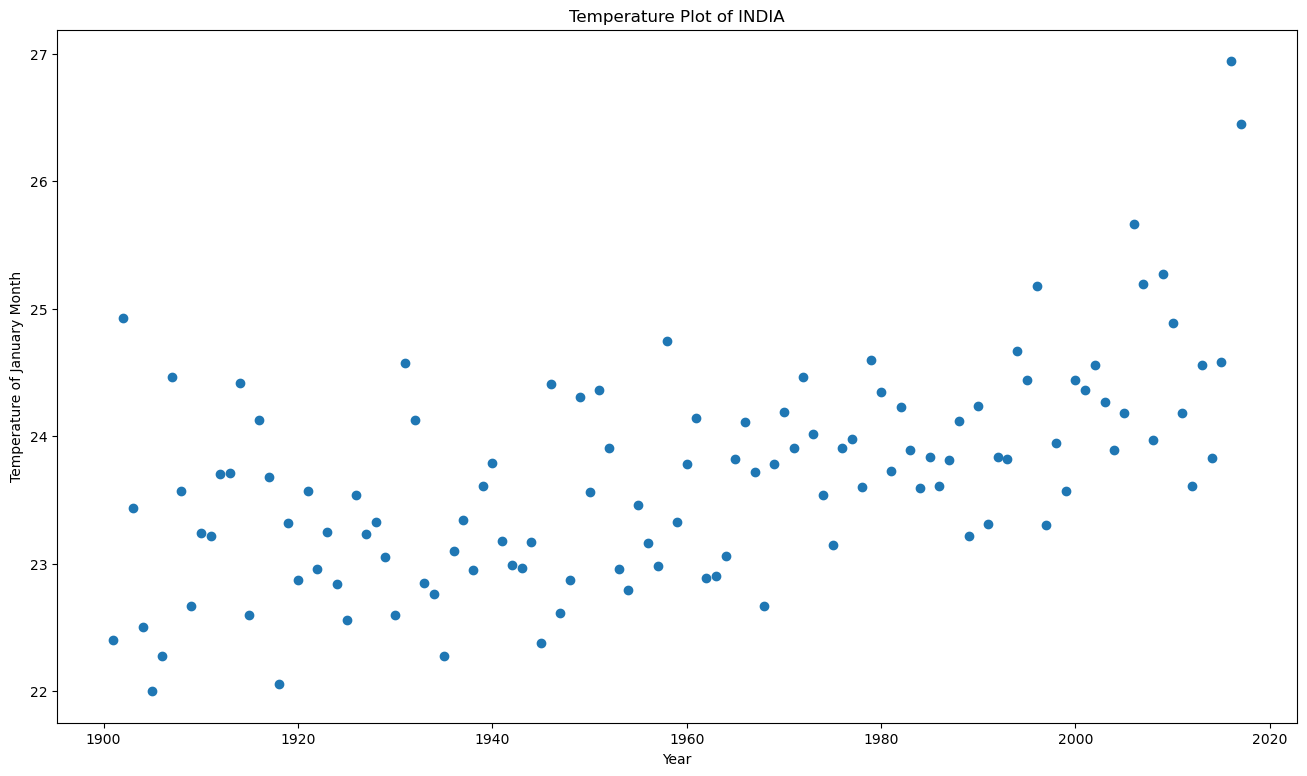

In [5]:
plt.figure(figsize=(16,9))
plt.title('Temperature Plot of INDIA')
plt.xlabel('Year')
plt.ylabel('Temperature of January Month')
plt.scatter(x,y)

In [6]:
# We have to reshape the data so that x contains both rows and columns.
x.shape
# If x is a pandas series, use the .values or .to_numpy() method to convert it into an array and then reshape it
print(type(x))

<class 'pandas.core.series.Series'>


In [7]:
x = x.to_numpy()

In [8]:
x = x.reshape(117,1)

In [9]:
x.shape

(117, 1)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
regressor = LinearRegression()

In [12]:
regressor.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
#This gives us the slope
regressor.coef_

array([0.01416034])

In [14]:
# Gives us the c value in y=mx+c
print(regressor.intercept_)

-4.052660537397539


In [15]:
regressor.predict([[2078]])

array([25.37251577])

In [16]:
# We find the predicted value using the model and compare it with the actual value y
predicted = regressor.predict(x)

In [17]:
# The diff btwn predicted and actual value = MAE
np.mean(abs(y-predicted))

# Another way to find MAE, MSE (use inbuilt sklearn.metrics functions):
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y,predicted)

np.float64(0.5269972511599087)

In [19]:
# MSE
np.mean((y-predicted) ** 2)

np.float64(0.4618622899063735)

In [20]:
# It gives model accuracy, we use it to find linearity in the model
from sklearn.metrics import r2_score
r2_score(y,predicted)

0.33119961409323107

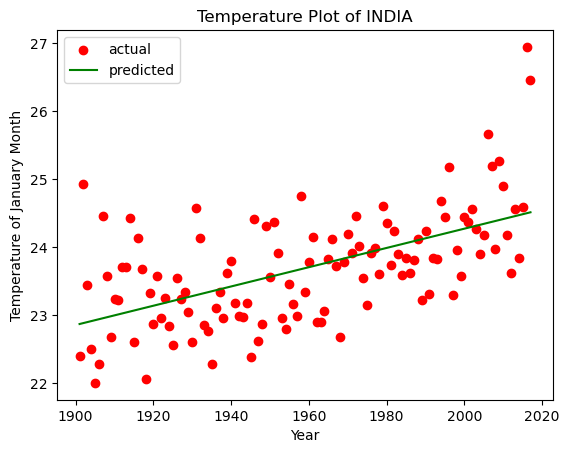

In [24]:
plt.title('Temperature Plot of INDIA')
plt.xlabel('Year')
plt.ylabel('Temperature of January Month')
plt.scatter(x,y, label='actual', color='r')
plt.plot(x,predicted, label='predicted', color='g')
plt.legend()

<Axes: xlabel='YEAR', ylabel='JAN'>

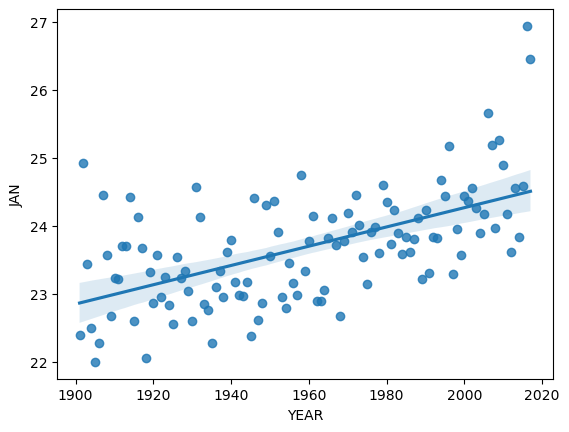

In [25]:
# To plot it easily, use seaborn:
sns.regplot(x='YEAR', y='JAN', data=df)